# Libraries Imported

### Stopwords
These are words which are mostly preprositions and hence offer no importance and thus needs to be removed
### Wordnet
Wordnet is a database that contains words from 200 laguages

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

#Natural Language Toolkit library is a library for natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DOLPHIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DOLPHIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DOLPHIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### CountVectorizer
CountVectorizer converts the words into vectors depending upon their occurence
### GridSearchCV
GridSearchCV is used to find good hyper parameters
### RandomForestClassifier
RandomForestClassifier Fits decision trees to improve accuracy

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### sklearn.metrics
These help provide statistical information about the model

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

# Reading & processing of data

### The data is read from a csv file

__Dataset used : Emotions dataset for NLP classification tasks__ <br>
https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

In [4]:
train_df=pd.read_csv("train.txt", delimiter=";",names=['text','label'])
val_df= pd.read_csv("val.txt", delimiter=";",names=['text','label'])

### Adding both train and test values

In [5]:
df=pd.concat([train_df, val_df])
df.reset_index(inplace=True, drop=True)
print("Number of line of text : ",df.shape[0])
df.head()

Number of line of text :  18000


,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### The amount of labels

<AxesSubplot:xlabel='label', ylabel='count'>

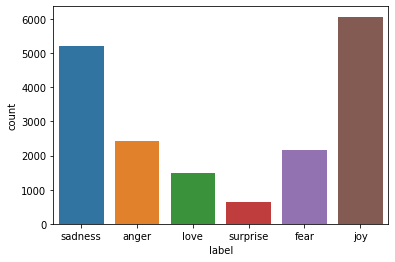

In [6]:
sns.countplot(df.label)

([<matplotlib.patches.Wedge at 0x29f7dc24d00>,
 [Text(1.0928636907974667, 0.12509577665348848, 'surprise'),
  Text(0.9723218031177161, 0.5143834281758245, 'love'),
  Text(-0.2541756427899439, 1.0702311631663128, 'joy'),
  Text(-1.0949173925150981, -0.10562151091486272, 'fear'),
  Text(-0.6871673593670297, -0.8589534447340809, 'anger'),
  Text(0.674804490977459, -0.8686995446969296, 'sadness')])

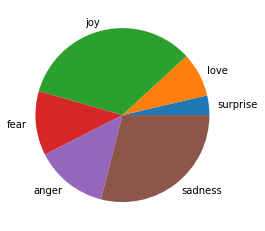

In [7]:
all_emotions = ['surprise', 'love', 'joy', 'fear', 'anger', 'sadness']
count_of_emotion = []
for emotion in all_emotions:
    count_of_emotion.append(np.sum(df['label'] == emotion))
plt.pie(count_of_emotion, labels = all_emotions)

There is improper ratio of data, High amount of Joy and Sadness is present so the data is baised towards Sadness and Joy

In [8]:
def custom_encoder(df):
    df.replace(to_replace="sadness", value=0, inplace=True)
    df.replace(to_replace="anger", value=1, inplace=True)
    df.replace(to_replace="love", value=2, inplace=True)
    
    df.replace(to_replace="surprise", value=3, inplace=True)
    df.replace(to_replace="fear", value=4, inplace=True)
    df.replace(to_replace="joy", value=5, inplace=True)

In [9]:
custom_encoder(df['label'])

## Labels encoded as
### 0  ->  Sadness,    1  ->  Anger,    2  ->  Love,      3  ->  Surprise,   4  ->  Fear,       5  ->  Joy

### Lemmatizer
Reducing the number of words by finding the root word out of it.
#### Process
Turns everything into lowercase then splits it based on " ", and then removes stopwords from it
This is the lemmatized to get the root words.
Its preffered over stemming because it doesnt strip the word to such a level that it can make it difficult to learn the meaning of it

In [10]:
lm=WordNetLemmatizer()
def text_transformation(df_col):
    corpus=[]
    for item in df_col:
        new_item= re.sub('[^a-zA-Z]',' ',str(item))
        new_item=new_item.lower()
        new_item=new_item.split()
        new_item=[lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [11]:
corpus= text_transformation(df['text'])
corpus

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

### CountVectorizer
CountVectorizer is used to convert sentences into matrix by focusing on the frequency of occurences of the words in it.
So it makes a matrix with rows being of each sentence and columns being of each word.
And the data is the frequency of their apperance.

In [12]:
cv=CountVectorizer(ngram_range=(1,2))
traindata= cv.fit_transform(corpus)

X=traindata
y=df.label

In [13]:
print(df['text'][10])
print("Its formatted as : ")
print(f"(sentence number, vocabulary)  number of occurence")
print(X[10])
print("-"*50)
print(df['text'][9])
print(X[9])
print("-"*50)

i feel like i have to make the suffering i m seeing mean something
Its formatted as : 
(sentence number, vocabulary)  number of occurence
  (0, 33108)	1
  (0, 58628)	1
  (0, 33931)	1
  (0, 63624)	1
  (0, 98638)	1
  (0, 89042)	1
  (0, 65124)	1
  (0, 93864)	1
  (0, 59287)	1
  (0, 63890)	1
  (0, 98671)	1
  (0, 89074)	1
  (0, 65221)	1
--------------------------------------------------
i feel romantic too
  (0, 33108)	1
  (0, 86278)	1
  (0, 34290)	1
--------------------------------------------------


### Gridsearchcv 
gridsearchcv is used to find out which hyperparameters are better for training

In [14]:
parameters= {'max_features':('auto','sqrt'),
             'n_estimators':[5,10],
             'max_depth':[10,None],
             'min_samples_split':[5],
             'min_samples_leaf':[1],
             'bootstrap':[True]}

It runs the models using these hyperparameters and gives out the one being the best

In [15]:
#RFC using cross fold classification with 5 folds
grid_search= GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True, n_jobs=2)
grid_search.fit(X,y)
#The best parameters selected
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [16]:
for i in range(2):
    #Parameters used on i'th text
    print('Parameters: ',grid_search.cv_results_['params'][i])
    #Their mean test score
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    #Their rank
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
Mean Test Score:  0.39233333333333337
Rank:  8
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Mean Test Score:  0.4021666666666667
Rank:  5


### Putting the best parameters into an RandomForestClassifier

RandomForestClassifier helps to fit number of decision trees over the entire dataset by using average which reduces overfitting

In [17]:
rfc= RandomForestClassifier(max_features= grid_search.best_params_['max_features'],
                            max_depth= grid_search.best_params_['max_depth'],
                            n_estimators= grid_search.best_params_['n_estimators'],
                            min_samples_split= grid_search.best_params_['min_samples_split'],
                            min_samples_leaf= grid_search.best_params_['min_samples_leaf'],
                            bootstrap= grid_search.best_params_['bootstrap'])
#fitting
rfc.fit(X,y)

RandomForestClassifier(min_samples_split=5, n_estimators=10)

### Doing the final prediction based on test data

Reading the test dataset from the test_df file

In [18]:
test_df= pd.read_csv('test.txt', delimiter=';',names=['text','label'])

In [19]:
#Putting the text and labels into label and target variables
X_test, y_test= test_df.text, test_df.label

#Encoding it to give several emotions as integer values
test_df= custom_encoder(y_test)

#Lemitizing the test_df which is text
test_corpus= text_transformation(X_test)

testdata=cv.transform(test_corpus)

#Predicting the test data using RandomForestClassifier
predictions=rfc.predict(testdata)

### Metric Scores

In [20]:
acc_score= accuracy_score( y_test, predictions)
#Precision and average scores for each emotion
print("All the emotions : ", all_emotions)
pre_score= precision_score(y_test, predictions, average=None)
rec_score= recall_score(y_test, predictions, average=None)

print("-"*100)
print('Accuracy Score:   ' , acc_score)
print('Precision Score: ',pre_score)
print('Recall Score:    ',rec_score)
print("-"*100)

cr=classification_report(y_test, predictions)
print(cr)

All the emotions :  ['surprise', 'love', 'joy', 'fear', 'anger', 'sadness']
----------------------------------------------------------------------------------------------------
Accuracy Score:    0.871
Precision Score:  [0.90459966 0.90661479 0.79562044 0.70491803 0.85849057 0.86327078]
Recall Score:     [0.91394148 0.84727273 0.68553459 0.65151515 0.8125     0.92661871]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       581
           1       0.91      0.85      0.88       275
           2       0.80      0.69      0.74       159
           3       0.70      0.65      0.68        66
           4       0.86      0.81      0.83       224
           5       0.86      0.93      0.89       695

    accuracy                           0.87      2000
   macro avg       0.84      0.81      0.82      2000
weighted avg       0.87      0.87    

Here the precison and recall score for emotion 3 or fear is the lowest.
Here it means that the : <br>
1- When the model predicted that there was the emotion of fear in the text, it was correct __64%__ of the time. <br>
2- The model correctly identifies the emotion as fear in the text only __58%__ of the time.

### Buliding functions for predicting

Writing a function to make it readable

In [21]:
def expression_check(prediction_input):
    if prediction_input==0:
        print("Input statement has sadness sentiment ")
    elif prediction_input==1:
        print("Input statement has anger sentiment")
    elif prediction_input==2:
        print("Input statement has love sentiment")
    elif prediction_input==3:
        print("Input statement has surprise sentiment")
    elif prediction_input==4:
        print("Input statement has fear sentiment")
    elif prediction_input==5:
        print("Input statement has joy sentiment")
    else:
        print("Invalid statement")

First we take the input text <br>
Then it is vectorized <br>
Then it is predicted in the model, <br>
At at last it goes through the above defined function to produce a readable output <br>

In [22]:
def sentiment_predictor(input):
    input=text_transformation(input)
    transformed_input=cv.transform(input)
    prediction=rfc.predict(transformed_input)
    expression_check(prediction)

### Predicting

In [23]:
input1=["I am really shocked for the re opening"]
input2=["I bought a new phone and it's so good"]
input3=["I am quite scared about the toughness of the screen"]

In [24]:
sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)

Input statement has surprise sentiment
Input statement has joy sentiment
Input statement has fear sentiment
